In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [6]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size=128
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results=model.fit(x_train,y_train, epochs=20,validation_data=(x_test, y_test),
                   callbacks=keras.callbacks.EarlyStopping(patience=7,restore_best_weights=True)
                  )



Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.3315 - accuracy: 0.5250 - val_loss: 1.5089 - val_accuracy: 0.4659
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3226 - accuracy: 0.5263 - val_loss: 1.4377 - val_accuracy: 0.4929
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3178 - accuracy: 0.5271 - val_loss: 1.4227 - val_accuracy: 0.4929
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3094 - accuracy: 0.5306 - val_loss: 1.4853 - val_accuracy: 0.4731
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3007 - accuracy: 0.5346 - val_loss: 1.4218 - val_accuracy: 0.5027
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2963 - accuracy: 0.5357 - val_loss: 1.4341 - val_accuracy: 0.4944
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2890 - accuracy: 0.5382 - val_loss: 1.4500 - val_accuracy:

In [18]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.4218 - accuracy: 0.5027


In [9]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [10]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)
y_pred1.shape

(10000,)

In [11]:
from sklearn.metrics import accuracy_score,  confusion_matrix
accuracy_score(y_test,y_pred1)*100

47.27

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
print(confusion_matrix(y_test,y_pred1))

[[395  50  68  16  22  10  44  61 272  62]
 [ 32 612   5  22   8  14  22  28  92 165]
 [ 47  39 290  57 134  70 197  97  54  15]
 [ 29  28  76 233  41 168 229  86  61  49]
 [ 41  18 113  34 352  33 211 124  55  19]
 [ 19  23  77 144  58 315 156 107  71  30]
 [  6  18  47  53  87  27 684  31  22  25]
 [ 28  26  52  50  65  48  64 572  29  66]
 [ 45  62   9  14  11  13  23  18 734  71]
 [ 30 186   6  33  12  11  24  52 106 540]]


8

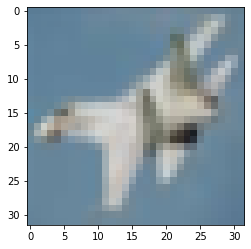

In [14]:
plt.imshow(x_test[10],cmap="gray")
y_pred1[10]

313/313 [==============================] - 1s 3ms/step - loss: 1.4886 - accuracy: 0.4727


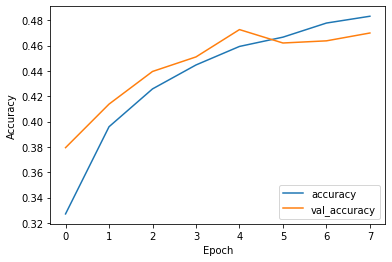

In [15]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)